# Demo notebook for `sourmash taxonomy` output to metacoder visualization

In [1]:
library(readr)
library(dplyr)
library(metacoder)
options(warn=-1) # stop warnings; an internal function in heat_tree() uses a partial match that generates many warnings and blocks the viz


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: taxa

This is metacoder verison 0.3.4 (stable)



In [2]:
data <- read_csv("demo.csv") %>%
  filter(rank == "species")


── Column specification ────────────────────────────────────────────────────────────────────────────────────
cols(
  rank = col_character(),
  fraction = col_double(),
  lineage = col_character()
)




In [3]:
taxmap <- parse_tax_data(data,
                         class_cols = "lineage", # the column that contains taxonomic information
                         class_sep = ";", # The character used to separate taxa in the classification
                         class_regex = "^(.+)__(.+)$", # Regex identifying where the data for each taxon is
                         class_key = c(tax_rank = "info", # A key describing each regex capture group
                                       tax_name = "taxon_name"))

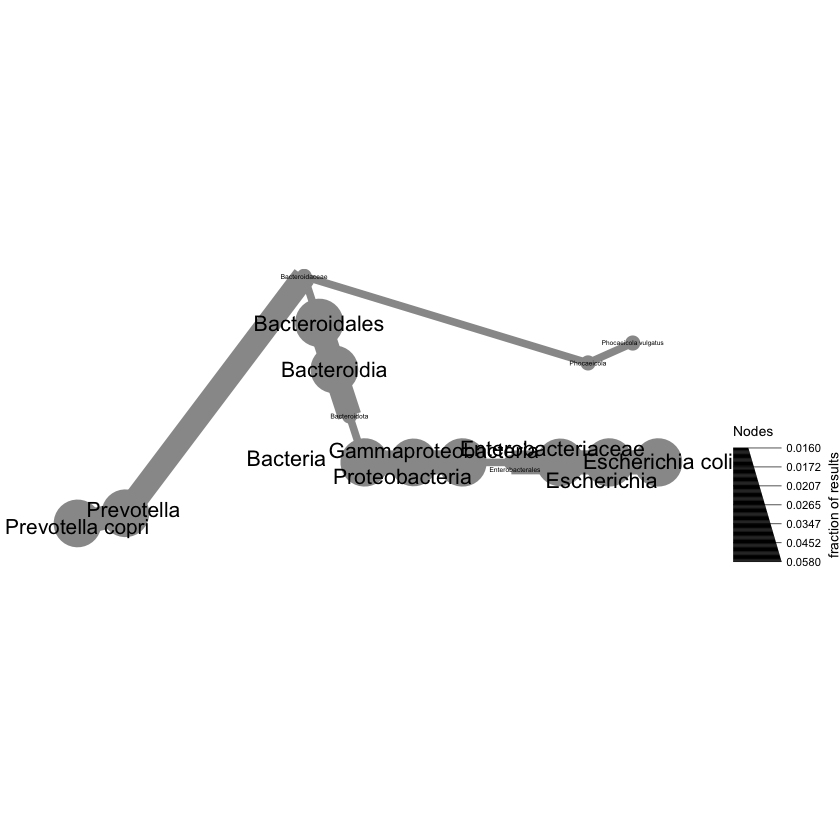

In [4]:
heat_tree(taxmap,
          node_label = taxon_names,
          node_size = taxmap$data$tax_data$fraction,
          node_size_axis_label = "fraction of results") 